<a href="https://colab.research.google.com/github/ameyas1/RecommendationSystem-AutoEncoder/blob/master/recommendation_1M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0b1

     |████████████████████████████████| 87.9MB 49.2MB/s 
     |████████████████████████████████| 501kB 56.0MB/s 
     |████████████████████████████████| 3.1MB 43.9MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip

--2019-12-01 13:45:13--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  14.9MB/s    in 0.4s    

2019-12-01 13:45:13 (14.9 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



In [0]:
import zipfile
with zipfile.ZipFile('ml-1m.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
import pandas as pd
df=pd.read_csv('ml-1m/ratings.dat',delimiter='::',header=None,names=['userId','movieId','rating','time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
df

,userId,movieId,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [0]:
data=df.describe()

  

In [8]:
data

,userId,movieId,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [0]:
cols=int(data['movieId']['max'])+1

In [0]:
rows=int(data['userId']['max'])+1

In [0]:
import numpy as np

In [0]:
utility=np.full((rows,cols),0.0)

In [0]:
for ind in df.index:
  row=int(df['userId'][ind])
  col=int(df['movieId'][ind])
  utility[row][col]=df['rating'][ind]

Adding **Noise**

In [0]:
noise_factor = 0.2
utility_noise = utility + noise_factor * np.random.normal(size=utility.shape)

In [0]:
utilityFrame_noise=pd.DataFrame(utility_noise)

In [16]:
utilityFrame_noise

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,-0.071058,-0.038032,-0.003256,0.183613,0.190391,0.120386,0.242396,0.163784,0.425484,-0.294781,-0.264334,0.059419,-0.111604,-0.147820,0.160890,0.004608,0.237443,0.204212,0.141438,0.086969,-0.181857,-0.251155,0.207690,-0.260638,-0.157228,0.228899,0.048219,-0.213182,0.013023,0.030680,-0.081246,0.331403,0.390073,-0.279858,-0.003521,0.022024,0.325057,0.093106,-0.182300,-0.115838,...,-0.064580,-0.044773,-0.226888,0.238472,0.177452,0.027909,0.127808,0.233290,0.059417,0.167118,-0.006369,0.127426,0.163244,0.032099,0.217216,0.035296,-0.047055,0.147552,0.157324,-0.103366,-0.470614,-0.076854,0.063526,-0.288773,0.217083,0.289994,0.039187,-0.062686,0.057992,-0.106215,0.166630,-0.054831,0.230511,0.139581,0.150521,0.023110,-0.017986,-0.087890,-0.246543,-0.176425
1,0.228825,4.961815,0.106109,0.054133,-0.111823,0.003553,0.096327,-0.121283,-0.044176,-0.068828,0.265086,0.363407,-0.291361,-0.359320,-0.129497,-0.168743,0.053701,0.084402,-0.277240,0.085337,0.147779,-0.072677,0.058780,-0.347408,-0.263323,-0.306900,0.106418,-0.132145,-0.016259,0.165958,-0.027312,0.356799,-0.182860,-0.079717,0.065292,0.051202,0.025834,0.179083,0.018132,-0.333194,...,-0.270064,-0.107140,0.343228,0.116652,-0.218453,-0.080295,-0.113828,0.036680,0.232317,0.398929,0.133303,0.080743,0.079960,-0.016609,0.308286,-0.149587,-0.207002,-0.189035,-0.004398,0.223884,-0.183247,0.205347,-0.027544,-0.000600,0.191854,0.102964,0.207462,0.093677,-0.019533,-0.030774,-0.003278,-0.200743,0.055531,-0.115086,-0.042487,-0.057096,-0.061371,-0.278424,-0.085059,-0.212478
2,0.080704,0.137365,0.126128,0.186418,-0.024384,-0.147382,-0.105414,-0.236343,-0.246407,0.040297,0.193056,0.157796,-0.311674,-0.002107,0.109646,-0.371596,-0.173961,0.017962,-0.075573,0.440594,0.213561,0.742361,-0.399960,0.227326,-0.203559,0.169769,0.051872,0.073635,0.146008,0.009131,-0.078582,0.282533,-0.169377,-0.133611,0.142346,0.254891,0.424096,-0.106514,0.101629,-0.098414,...,0.112797,-0.138565,0.138430,0.195661,0.259740,0.219851,-0.103710,0.031638,0.110873,0.369476,-0.307244,-0.126048,0.170487,0.024016,0.127532,-0.085663,0.339069,-0.085410,-0.290952,0.007821,-0.355218,-0.033951,0.035517,-0.027894,0.297801,-0.383264,0.240236,-0.144127,0.269826,-0.084117,0.137611,-0.130979,0.305868,-0.056841,0.043976,0.055443,-0.239956,0.205314,-0.058612,-0.005712
3,-0.261161,-0.155638,0.089446,-0.418220,-0.183891,-0.201668,-0.167243,0.120092,-0.098481,-0.021331,-0.183187,0.262588,0.157460,-0.155955,0.258951,-0.323867,0.106349,0.201641,0.111754,-0.446754,0.162969,0.028964,0.153794,-0.005543,-0.085036,-0.097228,0.081452,-0.137881,-0.046737,0.145551,0.045089,-0.008238,0.028919,0.362423,-0.133816,-0.081633,-0.471123,-0.088322,-0.224256,-0.039242,...,-0.295306,-0.287410,-0.090453,0.116750,0.252185,0.006893,0.394484,0.141065,0.102582,0.131995,-0.077051,-0.279374,0.405753,-0.038460,0.099669,-0.165267,0.360898,0.061110,-0.005197,0.094592,-0.105787,0.147197,0.286476,-0.111912,0.161464,-0.343426,0.150384,0.200891,-0.010990,0.074911,0.087109,-0.029139,-0.026322,0.189244,0.090329,0.037816,-0.299105,-0.034102,0.179579,-0.229101
4,-0.014145,-0.338043,-0.160137,-0.311408,0.038453,0.177147,0.067711,-0.343756,-0.037733,0.071462,-0.232670,0.072814,0.401690,0.092970,-0.273661,0.197111,-0.214262,0.097554,-0.033888,0.078354,0.100369,-0.383822,0.283890,0.198683,0.182919,-0.002943,-0.393608,-0.140868,-0.266089,-0.140062,-0.233081,-0.212157,0.077884,0.242175,0.063050,0.145321,0.114995,0.057687,-0.206704,0.375552,...,0.279665,-0.386906,-0.021334,-0.373463,-0.122912,-0.115902,0.028466,0.050321,0.052669,0.108333,0.240367,-0.014244,-0.326289,-0.001967,0.201837,-0.071499,-0.099168,0.015394,0.045818,-0.217032,0.178724,0.372852,-0.104714,-0.116769,-0.027103,0.032

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
utilityFrame_noise=utilityFrame_noise.drop(df.index[0])

In [0]:
utilityFrame_noise=utilityFrame_noise.drop([0],axis=1)

In [0]:
# X_train, X_test = train_test_split(utilityFrame_noise,test_size=0.01, random_state=42)

In [22]:
utilityFrame_noise.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
1,4.961815,0.106109,0.054133,-0.111823,0.003553,0.096327,-0.121283,-0.044176,-0.068828,0.265086,0.363407,-0.291361,-0.359320,-0.129497,-0.168743,0.053701,0.084402,-0.277240,0.085337,0.147779,-0.072677,0.058780,-0.347408,-0.263323,-0.306900,0.106418,-0.132145,-0.016259,0.165958,-0.027312,0.356799,-0.182860,-0.079717,0.065292,0.051202,0.025834,0.179083,0.018132,-0.333194,0.331782,...,-0.270064,-0.107140,0.343228,0.116652,-0.218453,-0.080295,-0.113828,0.036680,0.232317,0.398929,0.133303,0.080743,0.079960,-0.016609,0.308286,-0.149587,-0.207002,-0.189035,-0.004398,0.223884,-0.183247,0.205347,-0.027544,-0.000600,0.191854,0.102964,0.207462,0.093677,-0.019533,-0.030774,-0.003278,-0.200743,0.055531,-0.115086,-0.042487,-0.057096,-0.061371,-0.278424,-0.085059,-0.212478
2,0.137365,0.126128,0.186418,-0.024384,-0.147382,-0.105414,-0.236343,-0.246407,0.040297,0.193056,0.157796,-0.311674,-0.002107,0.109646,-0.371596,-0.173961,0.017962,-0.075573,0.440594,0.213561,0.742361,-0.399960,0.227326,-0.203559,0.169769,0.051872,0.073635,0.146008,0.009131,-0.078582,0.282533,-0.169377,-0.133611,0.142346,0.254891,0.424096,-0.106514,0.101629,-0.098414,-0.100084,...,0.112797,-0.138565,0.138430,0.195661,0.259740,0.219851,-0.103710,0.031638,0.110873,0.369476,-0.307244,-0.126048,0.170487,0.024016,0.127532,-0.085663,0.339069,-0.085410,-0.290952,0.007821,-0.355218,-0.033951,0.035517,-0.027894,0.297801,-0.383264,0.240236,-0.144127,0.269826,-0.084117,0.137611,-0.130979,0.305868,-0.056841,0.043976,0.055443,-0.239956,0.205314,-0.058612,-0.005712
3,-0.155638,0.089446,-0.418220,-0.183891,-0.201668,-0.167243,0.120092,-0.098481,-0.021331,-0.183187,0.262588,0.157460,-0.155955,0.258951,-0.323867,0.106349,0.201641,0.111754,-0.446754,0.162969,0.028964,0.153794,-0.005543,-0.085036,-0.097228,0.081452,-0.137881,-0.046737,0.145551,0.045089,-0.008238,0.028919,0.362423,-0.133816,-0.081633,-0.471123,-0.088322,-0.224256,-0.039242,0.048077,...,-0.295306,-0.287410,-0.090453,0.116750,0.252185,0.006893,0.394484,0.141065,0.102582,0.131995,-0.077051,-0.279374,0.405753,-0.038460,0.099669,-0.165267,0.360898,0.061110,-0.005197,0.094592,-0.105787,0.147197,0.286476,-0.111912,0.161464,-0.343426,0.150384,0.200891,-0.010990,0.074911,0.087109,-0.029139,-0.026322,0.189244,0.090329,0.037816,-0.299105,-0.034102,0.179579,-0.229101
4,-0.338043,-0.160137,-0.311408,0.038453,0.177147,0.067711,-0.343756,-0.037733,0.071462,-0.232670,0.072814,0.401690,0.092970,-0.273661,0.197111,-0.214262,0.097554,-0.033888,0.078354,0.100369,-0.383822,0.283890,0.198683,0.182919,-0.002943,-0.393608,-0.140868,-0.266089,-0.140062,-0.233081,-0.212157,0.077884,0.242175,0.063050,0.145321,0.114995,0.057687,-0.206704,0.375552,0.054061,...,0.279665,-0.386906,-0.021334,-0.373463,-0.122912,-0.115902,0.028466,0.050321,0.052669,0.108333,0.240367,-0.014244,-0.326289,-0.001967,0.201837,-0.071499,-0.099168,0.015394,0.045818,-0.217032,0.178724,0.372852,-0.104714,-0.116769,-0.027103,0.032567,0.145992,0.093086,-0.046058,0.176502,0.021409,0.389689,0.090749,0.268693,0.150336,0.061515,0.138582,-0.041080,-0.086801,-0.185437
5,-0.104187,0.131243,0.357858,-0.250473,-0.206546,2.063761,-0.248443,-0.232710,-0.012686,-0.085330,0.407846,0.305239,-0.435506,-0.080470,-0.264091,3.194675,0.071606,0.105499,-0.124866,-0.107804,0.160127,-0.208551,0.267652,1.402889,-0.036898,0.177284,0.257964,-0.149994,4.966869,-0.285351,-0.018857,4.129121,-0.272889,3.810552,-0.171663,3.221125,0.046198,-0.167148,3.171444,-0.099098,...,0.027737,0.179755,0.162103,0.206109,-0.255829,0.178601,0.053518,-0.250248,0.187605,0.067337,0.246170,0.066553,0.055211,-0.213906,-0.124334,0.086764,-0.144480,0.204430,-0.478641,-0.236869,0.295989,0.205139,0.252839,-0.260177,0.036184,-0.27

In [0]:
utilityFrame=pd.DataFrame(utility)

In [0]:
utilityFrame=utilityFrame.drop(df.index[0])
utilityFrame=utilityFrame.drop([0],axis=1)


In [0]:
X_train, X_test = train_test_split(utilityFrame,test_size=0.01, random_state=42)

In [26]:
X_test.shape

(61, 3952)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="cp/weights-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]
!mkdir cp

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [0]:
regularizer_encode=0.001
regularizer_decode=0.001
dropout=0.2

In [0]:
input_layer = x = tf.keras.layers.Input(shape=(X_train.shape[1]), name='UserRating')

In [0]:
# x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularizer_encode))(input_layer)
# x = tf.keras.layers.Dropout(rate = dropout)(x)

In [0]:
x = tf.keras.layers.Dense(32, activation='exponential', kernel_regularizer=tf.keras.regularizers.l2(regularizer_encode))(x)
x = tf.keras.layers.Dropout(rate = dropout)(x)

In [0]:
# x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularizer_decode))(x)
# x = tf.keras.layers.Dropout(rate = dropout)(x)

In [0]:
output_layer = tf.keras.layers.Dense(X_train.shape[1], name='UserScore',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regularizer_decode))(x)

In [0]:
model = tf.keras.models.Model(input_layer, output_layer)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserRating (InputLayer)      [(None, 3952)]            0         
_________________________________________________________________
dense (Dense)                (None, 32)                126496    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
UserScore (Dense)            (None, 3952)              130416    
Total params: 256,912
Trainable params: 256,912
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss='mse', metrics=['mse'])

In [38]:
history = model.fit(utilityFrame_noise,utilityFrame,epochs=500,batch_size=512,validation_data=(X_test,X_test), verbose=2,callbacks=[checkpoint])

Train on 6040 samples, validate on 61 samples
Epoch 1/500

Epoch 00001: val_loss improved from inf to 0.78231, saving model to cp/weights-01-0.78.hdf5
6040/6040 - 1s - loss: 1.0491 - mse: 0.9234 - val_loss: 0.7823 - val_mse: 0.6585
Epoch 2/500

Epoch 00002: val_loss improved from 0.78231 to 0.77000, saving model to cp/weights-02-0.77.hdf5
6040/6040 - 1s - loss: 0.7168 - mse: 0.5948 - val_loss: 0.7700 - val_mse: 0.6503
Epoch 3/500

Epoch 00003: val_loss improved from 0.77000 to 0.75765, saving model to cp/weights-03-0.76.hdf5
6040/6040 - 1s - loss: 0.6985 - mse: 0.5807 - val_loss: 0.7577 - val_mse: 0.6422
Epoch 4/500

Epoch 00004: val_loss improved from 0.75765 to 0.75062, saving model to cp/weights-04-0.75.hdf5
6040/6040 - 1s - loss: 0.7039 - mse: 0.5904 - val_loss: 0.7506 - val_mse: 0.6393
Epoch 5/500

Epoch 00005: val_loss improved from 0.75062 to 0.74095, saving model to cp/weights-05-0.74.hdf5
6040/6040 - 0s - loss: 0.6857 - mse: 0.5762 - val_loss: 0.7409 - val_mse: 0.6336
Epoch 6/

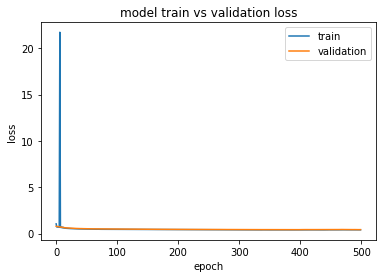

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline  
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

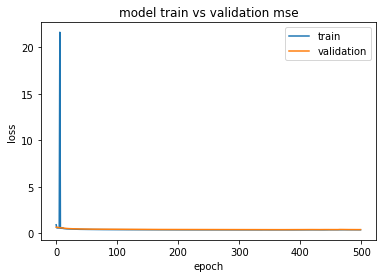

In [40]:
loss = history.history['mse']
val_loss = history.history['val_mse']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model train vs validation mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [0]:
model.load_weights("/content/cp/weights-402-0.42.hdf5")

In [46]:
movies=pd.read_csv('ml-1m/movies.dat',delimiter='::',header=None,names=['movieId','movie','genre'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [47]:
movies.head()

,movieId,movie,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
movies.shape

(3883, 3)

In [49]:
utilityFrame.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test=utilityFrame.iloc[[0]]

In [51]:
test=test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
k=model.predict(test)

In [56]:
for i in range(len(k[0])):
  if k[0][i]>0.5:
    print(i,movies['movie'][i],k[0][i],movies['genre'][i])

0 Toy Story (1995) 1.5389271 Animation|Children's|Comedy
33 Babe (1995) 1.0632445 Children's|Comedy|Drama
47 Pocahontas (1995) 0.52188545 Animation|Children's|Musical|Romance
49 Usual Suspects, The (1995) 0.6049188 Crime|Thriller
109 Taxi Driver (1976) 0.9982767 Drama|Thriller
149 Rob Roy (1995) 0.68217826 Drama|Romance|War
259 Little Princess, A (1995) 1.6091025 Children's|Drama
295 Pushing Hands (1992) 0.82046443 Comedy
317 Suture (1993) 1.1628155 Film-Noir|Thriller
355 I Like It Like That (1994) 0.9547392 Comedy|Drama|Romance
363 Mask, The (1994) 1.1917946 Comedy|Crime|Fantasy
456 Getting Even with Dad (1994) 0.6227287 Comedy
479 King of the Hill (1993) 0.9975854 Drama
526 Second Best (1994) 1.2351309 Drama
540 Striking Distance (1993) 0.5982883 Action
550 Trial by Jury (1994) 0.6126626 Thriller
587 Tough and Deadly (1995) 1.2066901 Action|Drama|Thriller
588 Batman (1989) 0.8260667 Action|Adventure|Crime|Drama
589 Silence of the Lambs, The (1991) 0.6480934 Drama|Thriller
591 Beauty 

In [54]:
for i in range(len(test[0])):
  if test[0][i]>0:
    print(i,movies['movie'][i],test[0][i],movies['genre'][i])

0 Toy Story (1995) 5.0 Animation|Children's|Comedy
47 Pocahontas (1995) 5.0 Animation|Children's|Musical|Romance
149 Rob Roy (1995) 5.0 Drama|Romance|War
259 Little Princess, A (1995) 4.0 Children's|Drama
526 Second Best (1994) 5.0 Drama
530 Shadowlands (1993) 4.0 Drama|Romance
587 Tough and Deadly (1995) 4.0 Action|Drama|Thriller
593 Pretty Woman (1990) 4.0 Comedy|Romance
594 Window to Paris (1994) 5.0 Comedy
607 Hellraiser: Bloodline (1996) 4.0 Action|Horror|Sci-Fi
660 All Things Fair (1996) 3.0 Drama
719 Cold Comfort Farm (1995) 3.0 Comedy
744 Gold Diggers: The Secret of Bear Mountain (1995) 3.0 Adventure|Children's
782 Hungarian Fairy Tale, A (1987) 4.0 Fantasy
913 Golden Earrings (1947) 3.0 Adventure|Romance
918 Notorious (1946) 4.0 Film-Noir|Romance|Thriller
937 East of Eden (1955) 4.0 Drama
1021 Freeway (1996) 5.0 Crime
1027 Secret Agent, The (1996) 5.0 Drama
1028 Secrets & Lies (1996) 5.0 Drama
1034 Long Kiss Goodnight, The (1996) 5.0 Action|Thriller
1096 Palookaville (1996) 4.

0.61228967